In [15]:
import numpy as np
import networkx as nx
import pandas as pd
import ipyleaflet as ipl
import matplotlib.pyplot as plt
import os
from ipyleaflet import Map
import math

In [16]:
airport = pd.read_csv('airport_analysis_data.csv')
def remove_space(num):
    return num.strip()
airport['state'] = airport['state'].apply(remove_space)
airport.head()

,Unnamed: 0,airport_id,city,state,name,lat,lng
0,0,10165,adak island,AK,adak,51.880000,-176.658056
1,1,10299,anchorage,AK,ted stevens anchorage international,61.175886,-149.990079
2,2,10304,aniak,AK,aniak airport,61.580799,-159.542583
3,3,10754,barrow,AK,wiley post/will rogers memorial,71.287421,-156.780270
4,4,10551,bethel,AK,bethel airport,60.779722,-161.837778


In [17]:
airport_state  = airport['state']
airport_name = airport['name']
airport_lat = airport['lat']
airport_lng = airport['lng']

In [18]:
graph = nx.Graph()

In [19]:
def distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371 # km

    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c

    return d

Clusters of Graphs Network Graph


F:\anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


Betweenes Centrality: 
{(51.88, -176.65805559999998): 0.0, (61.17588629999999, -149.9900792): 0.0, (61.58079920000001, -159.5425825): 0.0, (71.28742120000001, -156.7802701): 0.0, (60.77972200000001, -161.83777790000002): 0.0, (60.493435399999996, -145.4757287): 0.0, (70.1984121, -148.4611183): 0.0, (59.0420062, -158.50837099999998): 0.0, (64.8164163, -147.8635168): 0.0, (58.42246899999999, -135.70304209999998): 0.0, (58.3579806, -134.5831791): 0.0, (55.355410600000006, -131.7105604): 0.0, (58.67666699999999, -156.649167): 0.0, (57.7543254, -152.51695800000002): 0.0, (66.8913694, -162.6024888): 0.0, (64.5099347, -165.44351519999998): 0.0, (56.8016796, -132.9482065): 0.0, (57.05271949999999, -135.3651389): 0.0, (42.956899, -87.918669): 0.0, (53.8983407, -166.5442157): 0.0, (56.485023700000006, -132.3795998): 0.0, (59.509939100000004, -139.6686314): 0.0, (33.5624269, -86.754126): 0.0, (31.3148738, -85.44872099999998): 0.0, (34.6403329, -86.77568989999997): 0.0, (30.691904600000004, -88.24

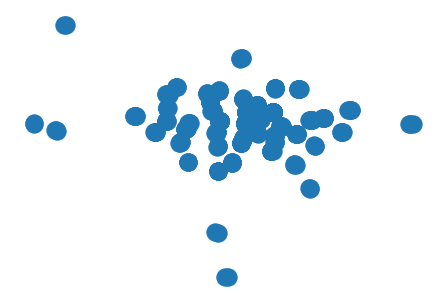

In [20]:
seg_data={}
state_code = np.unique(airport['state'])
com_graph = nx.Graph()

for dt in state_code:
    res = []
    lati = airport['lat'][airport['state']==dt].values
    long = airport['lng'][airport['state']==dt].values
    state = airport['name'][airport['state']==dt].values
    for lt,lg,st in zip(lati,long,state):
        res.append(((lt,lg),st))
        
    seg_data[dt.strip()] = res
#print(seg_data)

print("Clusters of Graphs Network Graph")
pos = nx.spring_layout(com_graph)
for dt in state_code:
    res = seg_data[dt]
    #print(dt)
    for i in range(len(res)):
        for j in range(i+1,len(res)):
            #print(res[i][0],res[j][0])
            com_graph.add_edge(res[i][0],res[j][0],weight=distance(res[i][0],res[j][0]))        
nx.draw(com_graph,label=True)
print("Betweenes Centrality: ")
bet_cent = nx.betweenness_centrality(com_graph)
print(bet_cent)

In [21]:
def form_cluster(state_codes,seg_data):
    check_graph = nx.Graph()
    res = seg_data[state_codes]
    for i in range(len(res)):
        check_graph.add_node(res[i][1])
    for i in range(len(res)):
            for j in range(i+1,len(res)):
                #print(res[i][0],res[j][0])
                check_graph.add_edge(res[i][1],res[j][1],weight=int(distance(res[i][0],res[j][0])))
                #print(distance(res[i][0],res[j][0]))
    weight = nx.get_edge_attributes(check_graph,'weight')
    pos  = nx.get_node_attributes(check_graph,'pos')
    nx.draw(check_graph,with_labels=True)
    print("Distance Between Airport:")
    for v in weight:
        print(v[0],"---->",v[1],":",weight[v],"Km")
#----------------------------------------------------------------
#----------------------------------------------------------------
def Graph_Properies(state_codes,seg_data):
    check_graph = nx.Graph()
    res = seg_data[state_codes]
    for i in range(len(res)):
        check_graph.add_node(res[i][1])
    for i in range(len(res)):
        for j in range(i+1,len(res)):
            #print(res[i][0],res[j][0])
            check_graph.add_edge(res[i][1],res[j][1],weight=int(distance(res[i][0],res[j][0])))
            #print(distance(res[i][0],res[jdegree_centrality][0]))
    print("Betweenes Centrality: ")
    bet_cent = nx.betweenness_centrality(check_graph)
    print(bet_cent)
    print("Degree Centrality: ")
    deg_cet = nx.degree_centrality(check_graph)
    print(deg_cet)
    print("Communication Links: ")
    com_lnk = nx.communicability(check_graph)
    print(com_lnk)
    
def getCliques(state_codes,seg_data):
    check_graph = nx.Graph()
    res = seg_data[state_codes]
    for i in range(len(res)):
        check_graph.add_node(i)
    for i in range(len(res)):
        for j in range(i+1,len(res)):
            #print(res[i][0],res[j][0])
            check_graph.add_edge(i,j)
    coords=nx.spring_layout(check_graph)
    cliques=[clique for clique in nx.find_cliques(check_graph) if len(clique)>1]
    nx.draw(check_graph,pos=coords)
    

Distance Between Airport:
adak ----> ted stevens anchorage international : 1914 Km
adak ----> aniak airport : 1492 Km
adak ----> wiley post/will rogers memorial : 2373 Km
adak ----> bethel airport : 1340 Km
adak ----> merle k mudhole smith : 2126 Km
adak ----> deadhorse airport : 2491 Km
adak ----> dillingham airport : 1386 Km
adak ----> fairbanks international : 2177 Km
adak ----> gustavus airport : 2655 Km
adak ----> juneau international : 2721 Km
adak ----> ketchikan international : 2937 Km
adak ----> king salmon airport : 1467 Km
adak ----> kodiak airport : 1667 Km
adak ----> ralph wien memorial : 1839 Km
adak ----> nome airport : 1545 Km
adak ----> petersburg james a johnson : 2834 Km
adak ----> sitka rocky gutierrez : 2685 Km
adak ----> st. mary's airport : 6327 Km
adak ----> unalaska airport : 713 Km
adak ----> wrangell airport : 2874 Km
adak ----> yakutat airport : 2430 Km
ted stevens anchorage international ----> aniak airport : 510 Km
ted stevens anchorage international ---->

ketchikan international ----> sitka rocky gutierrez : 294 Km
ketchikan international ----> st. mary's airport : 3399 Km
ketchikan international ----> unalaska airport : 2224 Km
ketchikan international ----> wrangell airport : 132 Km
ketchikan international ----> yakutat airport : 662 Km
king salmon airport ----> kodiak airport : 262 Km
king salmon airport ----> ralph wien memorial : 961 Km
king salmon airport ----> nome airport : 796 Km
king salmon airport ----> petersburg james a johnson : 1414 Km
king salmon airport ----> sitka rocky gutierrez : 1266 Km
king salmon airport ----> st. mary's airport : 4885 Km
king salmon airport ----> unalaska airport : 808 Km
king salmon airport ----> wrangell airport : 1458 Km
king salmon airport ----> yakutat airport : 971 Km
kodiak airport ----> ralph wien memorial : 1138 Km
kodiak airport ----> nome airport : 1018 Km
kodiak airport ----> petersburg james a johnson : 1176 Km
kodiak airport ----> sitka rocky gutierrez : 1027 Km
kodiak airport ----> 

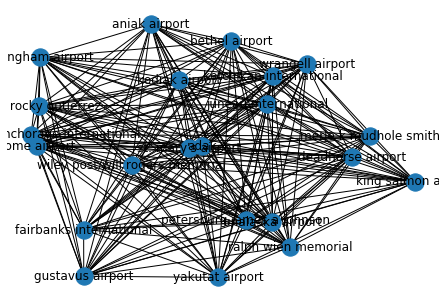

In [22]:
form_cluster("AK",seg_data)

In [23]:
distance((51.880000,-176.658056),(61.175886 ,-149.990079))

1914.0834325704377

In [24]:
Graph_Properies("IN",seg_data)

Betweenes Centrality: 
{'evansville regional': 0.0, 'fort wayne international': 0.0, 'indianapolis international': 0.0, 'south bend airport': 0.0}
Degree Centrality: 
{'evansville regional': 1.0, 'fort wayne international': 1.0, 'indianapolis international': 1.0, 'south bend airport': 1.0}
Communication Links: 
{'evansville regional': {'evansville regional': 5.297293811675499, 'fort wayne international': 4.929414370504056, 'indianapolis international': 4.929414370504057, 'south bend airport': 4.929414370504057}, 'fort wayne international': {'evansville regional': 4.929414370504056, 'fort wayne international': 5.297293811675499, 'indianapolis international': 4.929414370504057, 'south bend airport': 4.929414370504057}, 'indianapolis international': {'evansville regional': 4.929414370504057, 'fort wayne international': 4.929414370504057, 'indianapolis international': 5.297293811675502, 'south bend airport': 4.929414370504059}, 'south bend airport': {'evansville regional': 4.92941437050405

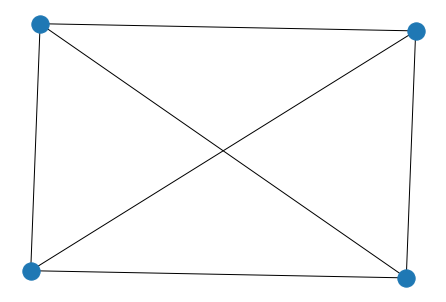

In [25]:
getCliques("IN",seg_data)

In [13]:
#Plotting on the map
from ipyleaflet import Map, Marker, MarkerCluster

res = seg_data['IN']
m = Map(center=(res[0][0][0], res[0][0][1]), zoom=2)
cluster_location_map = []
for vt in res:
    mark = Marker(location =(vt[0][0],vt[0][1]),title=vt[1],alt=vt[1])
    cluster_location_map.append(mark)

location = []
for i in range(len(res)):
    col = []
    for j in range(i+1,len(res)):
        col.append(res[j][0])
    
marker_cluster = MarkerCluster(markers=cluster_location_map,label=True)

m.add_layer(marker_cluster)

m

Map(center=[38.0433641, -87.52717539999998], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_…

In [14]:
m

Map(center=[38.0433641, -87.52717539999998], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_…

In [13]:
from ipyleaflet import Map, Marker, MarkerCluster
m = Map(center=(50, 0), zoom=5)
marker1 = Marker(location=(40.721319,-73.844311))
marker2 = Marker(location=(40.7214524, -73.8442075))

marker_cluster = MarkerCluster(markers=(marker1, marker2),label=True)

m.add_layer(marker_cluster)

m


Map(center=[50, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…